In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('C:/Users/Tedi/Downloads/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
sales                    14999
salary                   14999
dtype: int64

Pentru a putea folosi un Support Vector Machine este nevoie sa codificam variabilele categoriale. Mai intai vom verifica valorile luate de fiecare variabila de acest tip.

In [5]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
le = LabelEncoder() #transformam variabilele categoriale in forma numerica
df["sales"]=le.fit_transform(df["sales"])
df["salary"]=le.fit_transform(df["salary"])

In [8]:
df.head() #verificam daca codificarea a functionat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


Vom nota cu X variabilele explicative si cu y variabila dependenta, apoi vom imparti setul de date in parti pentru testare si pentru antrenare.

In [9]:
X = df.drop('left', axis = 1).copy()
y = df['left'].copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [11]:
scaler = StandardScaler() #folosim standard scaler pentru a standardiza variabilele

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

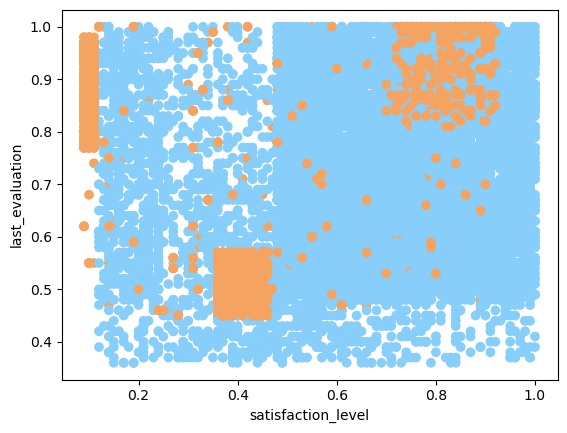

In [12]:
df['CLASA'] = np.where(df['left'] > 0, "Plecat", "Ramas")
df['Color'] = np.where(df['left'] > 0, "sandybrown", "lightskyblue")
plt.scatter(df['satisfaction_level'], df['last_evaluation'], linewidth=1, color=df['Color'])
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show()  

Asa cum am vazut si mai sus, datele nu sunt separabile in mod liniar, deci vom folosi kerneluri de tip radial, polinomial si sigmoid. Valoarea default a parametrului de ajustare este de 1.0. Dupa identificarea celui mai eficient model, vom utiliza metoda grid search pentru a identifica cea mai buna combinatie de parametrii. Intai vom incerca diferite functii polinomiale.

In [13]:
model_svm_poly_2 = SVC(kernel = 'poly', degree = 2, random_state = 0)
model_svm_poly_2.fit(X_train, y_train)

SVC(degree=2, kernel='poly', random_state=0)

In [14]:
yp2_pred = model_svm_poly_2.predict(X_test)

In [15]:
accuracy_svm_poly_2 = accuracy_score(y_test, yp2_pred)
print(accuracy_svm_poly_2)

0.9408888888888889


In [16]:
model_svm_poly_4 = SVC(kernel = 'poly', degree = 4, random_state = 0)
model_svm_poly_4.fit(X_train, y_train)

SVC(degree=4, kernel='poly', random_state=0)

In [17]:
yp4_pred = model_svm_poly_4.predict(X_test)

In [18]:
accuracy_svm_poly_4 = accuracy_score(y_test, yp4_pred)
print(accuracy_svm_poly_4)

0.954


In [19]:
model_svm_poly_6 = SVC(kernel = 'poly', degree = 6, random_state = 0)
model_svm_poly_6.fit(X_train, y_train)

SVC(degree=6, kernel='poly', random_state=0)

In [20]:
yp6_pred = model_svm_poly_6.predict(X_test)

In [21]:
accuracy_svm_poly_6= accuracy_score(y_test, yp6_pred)
print(accuracy_svm_poly_6)

0.9526666666666667


In [22]:
model_svm_poly_8 = SVC(kernel = 'poly', degree = 8, random_state = 0)
model_svm_poly_8.fit(X_train, y_train)

SVC(degree=8, kernel='poly', random_state=0)

In [23]:
yp8_pred = model_svm_poly_8.predict(X_test) # performantele scad odata cu cresterea gradului functiei mai mult de 4-6

In [24]:
accuracy_svm_poly_8= accuracy_score(y_test, yp8_pred)
print(accuracy_svm_poly_8)

0.9464444444444444


In [25]:
model_svm_poly_12 = SVC(kernel = 'poly', degree = 12, random_state = 0)
model_svm_poly_12.fit(X_train, y_train)

SVC(degree=12, kernel='poly', random_state=0)

In [26]:
yp12_pred = model_svm_poly_12.predict(X_test) 

In [27]:
accuracy_svm_poly_12= accuracy_score(y_test, yp12_pred) # pe baza rezultatelor de pana acum vom incerca cu gradul 5
print(accuracy_svm_poly_12) 

0.9237777777777778


In [28]:
model_svm_poly_5 = SVC(kernel = 'poly', degree = 5, random_state = 0)
model_svm_poly_5.fit(X_train, y_train)

SVC(degree=5, kernel='poly', random_state=0)

In [29]:
yp5_pred = model_svm_poly_5.predict(X_test) 

In [30]:
accuracy_svm_poly_5= accuracy_score(y_test, yp5_pred) # acesta este cel mai eficient model
print(accuracy_svm_poly_5) 

0.9575555555555556


In [31]:
conf_matrix_svm_poly5 = confusion_matrix(y_test, yp5_pred) #I N T E RPRETARE
print(conf_matrix_svm_poly5)

[[3342   55]
 [ 136  967]]


In [32]:
classification_rep_svm_poly5= classification_report(y_test, yp5_pred)
print(classification_rep_svm_poly5)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3397
           1       0.95      0.88      0.91      1103

    accuracy                           0.96      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.96      0.96      0.96      4500



In [33]:
model_svm_rbf = SVC(kernel = 'rbf', random_state = 0) 
model_svm_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [34]:
yrbf_pred = model_svm_rbf.predict(X_test)

In [35]:
conf_matrix_svm_rbf = confusion_matrix(y_test, yrbf_pred) #I N T E RPRETARE
print(conf_matrix_svm_rbf)

[[3332   65]
 [ 111  992]]


In [36]:
accuracy_svm_rbf = accuracy_score(y_test, yrbf_pred)
print(accuracy_svm_rbf)

0.9608888888888889


In [37]:
classification_rep_svm_rbf= classification_report(y_test, yrbf_pred)
print(classification_rep_svm_rbf)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3397
           1       0.94      0.90      0.92      1103

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [38]:
model_svm_sig = SVC(kernel = 'sigmoid', random_state = 0) 
model_svm_sig.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [39]:
ysig_pred = model_svm_sig.predict(X_test)

In [40]:
conf_matrix_svm_sig = confusion_matrix(y_test, ysig_pred) #I N T E RPRETARE
print(conf_matrix_svm_sig)

[[2467  930]
 [1066   37]]


In [41]:
accuracy_svm_sig = accuracy_score(y_test, ysig_pred)
print(accuracy_svm_sig)

0.5564444444444444


In [42]:
classification_rep_svm_sig= classification_report(y_test, ysig_pred)
print(classification_rep_svm_sig)

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      3397
           1       0.04      0.03      0.04      1103

    accuracy                           0.56      4500
   macro avg       0.37      0.38      0.37      4500
weighted avg       0.54      0.56      0.55      4500



Din punct de vedere al acuratetii cele mai bune performate le obtine modelul cu kernel radial, urmat de cel polinomial de grad 5. Astfel, vom utiliza grid search pentru modelul cu kernel radial.

In [43]:
param_grid = {
    'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20],
    'gamma': [0.1, 0.5, 0.75, 1, 2, 3, 4]
}

In [44]:
svm_rbf = SVC(kernel='rbf')

In [45]:
grid_search = GridSearchCV(svm_rbf, param_grid) #numarul de validari incrucisate default este de 5
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20],
                         'gamma': [0.1, 0.5, 0.75, 1, 2, 3, 4]})

In [46]:
print("Cea mai buna combinatie de parametri:", grid_search.best_params_)

Cei mai buni parametri: {'C': 2, 'gamma': 2}


In [47]:
print("Cea mai mare acuratete:", grid_search.best_score_)

Cea mai buna acuratete: 0.9779022210122734


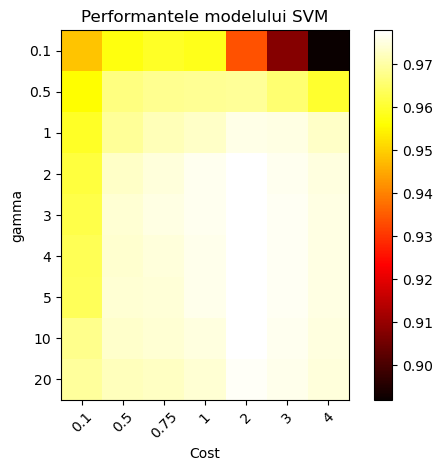

In [55]:
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Cost')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Performantele modelului SVM')
plt.show()

Putem observa ca cea mai mare acuratete se intalneste atunci cand parametrul de Cost ia valoarea 2 iar parametrul gamma ia valori cuprinse intre 2 si 10.